# Study of data reuse: Electrophysiological data of cortical layer 6 neurons and synaptically coupled neuronal pairs (v1)

In this notebook we will look more closely at the EBRAINS dataset "[Electrophysiological data of cortical layer 6 neurons and synaptically coupled neuronal pairs (v1)](https://search.kg.ebrains.eu/instances/5b55cc01-8eb2-48fa-967d-d0c6c2c0e67d)", contributed by  Dirk Feldmeyer from the Institute of Neuroscience and Medicine of Jülich, Germany.

As we can see from the dataset description,

<i>This dataset provides a electrophysiological characterisation of cortical neurons and synaptically coupled neuronal pairs that is essential to understand their functions in brain microcircuits. Electrophysiological data were collected by using single or dual patch-clamp recordings from primary somatosensory (barrel) cortical layer 6 neurons in acute rat brain slices.</i> [[Data Descriptor](https://search.kg.ebrains.eu/instances/5b55cc01-8eb2-48fa-967d-d0c6c2c0e67d)].

This dataset forms part of the results reported in:

   Yang, D., Günter, R., Qi, G., Radnikow, G., & Feldmeyer, D. (2020). Muscarinic and Nicotinic Modulation of Neocortical Layer 6A Synaptic Microcircuits Is Cooperative and Cell-Specific. *Cerebral cortex* (New York, N.Y. : 1991), **30**(6), 3528–3542. https://doi.org/10.1093/cercor/bhz324

In this notebook we will demonstrate how to access the data files and the metadata from this study, and how these data can be analysed and visualised, with the goal of reproducing some of the figures from the article. 

### Notes: 
Unable to open most files because in pxp format. Managed to reproduce some graphs from the xlsx files but lots of data is missing so impossible to reproduce everything 

impossible to open pxp files, tried with igor but unable to install it 

## Download dataset

In [1]:
token = "eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJfNkZVSHFaSDNIRmVhS0pEZDhXcUx6LWFlZ3kzYXFodVNJZ1RXaTA1U2k0In0.eyJleHAiOjE2ODA4NjA5MTksImlhdCI6MTY4MDY5Mzk0MSwiYXV0aF90aW1lIjoxNjgwMjU2MTE5LCJqdGkiOiI2MzEzN2EwOS05MDJmLTRhMTYtYmQ5NC00MzMwNDg5NWI3MWUiLCJpc3MiOiJodHRwczovL2lhbS5lYnJhaW5zLmV1L2F1dGgvcmVhbG1zL2hicCIsImF1ZCI6WyJqdXB5dGVyaHViIiwidHV0b3JpYWxPaWRjQXBpIiwieHdpa2kiLCJqdXB5dGVyaHViLWpzYyIsInRlYW0iLCJwbHVzIiwiZ3JvdXAiXSwic3ViIjoiYzU0ODdjNWItYjVkNi00MWIxLWI1MDYtNzczYTA0YTc0ZDAzIiwidHlwIjoiQmVhcmVyIiwiYXpwIjoibW9kZWwtdmFsaWRhdGlvbi1zZXJ2aWNlIiwibm9uY2UiOiJFcjFNcnlOMDVHMW5URnlPZ3BtMyIsInNlc3Npb25fc3RhdGUiOiJjMjk2ZTFlNy05MzdlLTQwZmMtOTUwYi1kZDVlMTFjYzk1MzEiLCJhY3IiOiIwIiwic2NvcGUiOiJvcGVuaWQgcHJvZmlsZSBjb2xsYWIuZHJpdmUgY2xiLndpa2kud3JpdGUgcm9sZXMgZ3JvdXAgY2xiLndpa2kucmVhZCB0ZWFtIiwic2lkIjoiYzI5NmUxZTctOTM3ZS00MGZjLTk1MGItZGQ1ZTExY2M5NTMxIiwiZ2VuZGVyIjoiMCIsIm5hbWUiOiJBbmRyZXcgRGF2aXNvbiIsInByZWZlcnJlZF91c2VybmFtZSI6ImFkYXZpc29uIiwiZ2l2ZW5fbmFtZSI6IkFuZHJldyIsImZhbWlseV9uYW1lIjoiRGF2aXNvbiJ9.xusozeAAorEzFwJtj8RYtfskAGHG0nbZ6mqCrmaf-piFqCL7Y1NAOKR7V-I5QhCfaxd3k0-7PQdcWeWKvFe3oimN1XEd3c9bvUQfmDg7UxN7jlo3cJBysvdz1VdnKRCGiOb6RoI0_MsnDLxkOUUO154WXCeO6i5G9LpSVDMNHFOS2oBSbZKfnGJvsqzFuF2yadvJA0Y-N6HwfFEUsJIi1MUu7rzfZh5LLxnbf9L_DcRUbWhA50eNqyoYUQohHxpeMICQ41RTDdIj-xXhf8DPvVBsUBwScy7kuc6gRM7dUHc-1YhBhkDq2wswXMIZ32S87_bjMTNY9wNTLyNaBsaVEQ"

In [2]:
from fairgraph import KGClient
import fairgraph.openminds.core as omcore

#client = KGClient(host="core.kg.ebrains.eu", token=clb_oauth.get_token())
client = KGClient(host="core.kg.ebrains.eu", token=token)
dataset = omcore.Dataset.by_name("Electrophysiological data of cortical layer 6 neurons and synaptically coupled neuronal pairs", client)
dataset_version = dataset.versions.resolve(client)

In [3]:
# This is a 17 GB dataset. On the Collaboratory, this should _not_ be downloaded into the Drive.
# Maybe only download the specific files we use in this notebook.
# zip_file = dataset_version.download("downloads", client)

In [4]:
# trying to use "unzip" on Mac OS: zip_file contains filenames with "Illegal byte sequence", e.g.
# Acetylcholine modulation in S1 cortex layer 6/Dose response curve (MEC)/BC 25062019 B/BC 25062019 B 1-�M.pxp

# ArchiveUtility seems to work.

### Fig 5d

In [6]:
# Read data from Excel spreadsheet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_dir = "downloads/hbp-d002323_NeuromodNeocortex-EPhys_pub/Acetylcholine modulation in S1 cortex layer 6/L6A paired ACh analysis"
ex_to_ex = pd.read_excel(
    f"{data_dir}/ Ach effec on L6A PSP.xls", 
    sheet_name="Ex.-to-Ex.", 
    skiprows=[1, 2], 
    nrows=25,
    na_values="-"
)
ex_to_inh = pd.read_excel(
    f"{data_dir}/ Ach effec on L6A PSP.xls", 
    sheet_name="Ex.-to-FS or non-FS", 
    skiprows=[1, 2], 
    nrows=9,
    na_values="-"
)

cc_cc = ex_to_ex.loc[ex_to_ex["Morphology comment"].isin(["CC-CC", "CC-(bip)CC"])]
cc_ct = ex_to_ex.loc[ex_to_ex["Morphology comment"] == "CC-CT"]
cc_inh = ex_to_inh

In [7]:
epsp_amplitude = {
    "Ctrl": {
        "CC-CC": {
            "mean": cc_cc["Amp.  control"].mean(),
            "stdev": cc_cc["Amp.  control"].std()
        },
        "CC-CT": {
            "mean": cc_ct["Amp.  control"].mean(),
            "stdev": cc_ct["Amp.  control"].std()
        },
        "CC-interneuron": {
            "mean": cc_inh["Amp.  control"].mean(),
            "stdev": cc_inh["Amp.  control"].std()
        }
    },
    "ACh": {
        "CC-CC": {
            "mean": cc_cc["Amp. Ach30µM"].mean(),
            "stdev": cc_cc["Amp. Ach30µM"].std()
        },
        "CC-CT": {
            "mean": cc_ct["Amp. Ach30µM"].mean(),
            "stdev": cc_ct["Amp. Ach30µM"].std()
        },
        "CC-interneuron": {
            "mean": cc_inh["Amp. Ach30"].mean(),
            "stdev": cc_inh["Amp. Ach30"].std()
        }
    }
}

In [8]:
paired_pulse_ratio = {
    "Ctrl": {
        "CC-CC": {
            "mean": cc_cc["PPR control"].mean(),
            "stdev": cc_cc["PPR control"].std()
        },
        "CC-CT": {
            "mean": cc_ct["PPR control"].mean(),
            "stdev": cc_ct["PPR control"].std()
        },
        "CC-interneuron": {
            "mean": cc_inh["PPR control"].mean(),
            "stdev": cc_inh["PPR control"].std()
        }
    },
    "ACh": {
        "CC-CC": {
            "mean": cc_cc["PPR Ach 30"].mean(),
            "stdev": cc_cc["PPR Ach 30"].std()
        },
        "CC-CT": {
            "mean": cc_ct["PPR Ach 30"].mean(),
            "stdev": cc_ct["PPR Ach 30"].std()
        },
        "CC-interneuron": {
            "mean": cc_inh["PPR Ach 30"].mean(),
            "stdev": cc_inh["PPR Ach 30"].std()
        }
    }
}

In [9]:
coefficient_of_variation = {
    "Ctrl": {
        "CC-CC": {
            "mean": cc_cc["CV control"].mean(),
            "stdev": cc_cc["CV control"].std()
        },
        "CC-CT": {
            "mean": cc_ct["CV control"].mean(),
            "stdev": cc_ct["CV control"].std()
        },
        "CC-interneuron": {
            "mean": cc_inh["CV control"].mean(),
            "stdev": cc_inh["CV control"].std()
        }
    },
    "ACh": {
        "CC-CC": {
            "mean": cc_cc["CV Ach30"].mean(),
            "stdev": cc_cc["CV Ach30"].std()
        },
        "CC-CT": {
            "mean": cc_ct["CV Ach30"].mean(),
            "stdev": cc_ct["CV Ach30"].std()
        },
        "CC-interneuron": {
            "mean": cc_inh["CV Ach30"].mean(),
            "stdev": cc_inh["CV Ach30"].std()
        }
    }
}

In [10]:
failure_rate = {
    "Ctrl": {
        "CC-CC": {
            "mean": cc_cc["Failure  CTR"].mean(),
            "stdev": cc_cc["Failure  CTR"].std()
        },
        "CC-CT": {
            "mean": cc_ct["Failure  CTR"].mean(),
            "stdev": cc_ct["Failure  CTR"].std()
        },
        "CC-interneuron": {
            "mean": cc_inh["Failure  CTR"].mean(),
            "stdev": cc_inh["Failure  CTR"].std()
        }
    },
    "ACh": {
        "CC-CC": {
            "mean": cc_cc["Failure  Ach30"].mean(),
            "stdev": cc_cc["Failure  Ach30"].std()
        },
        "CC-CT": {
            "mean": cc_ct["Failure  Ach30"].mean(),
            "stdev": cc_ct["Failure  Ach30"].std()
        },
        "CC-interneuron": {
            "mean": cc_inh["Failure  Ach30"].mean(),
            "stdev": cc_inh["Failure  Ach30"].std()
        }
    }
}

In [11]:
def plot_statistics(data, axes, label, ylim, show_legend=False):
    """This function plots one of the panels as in Fig 5D"""
    
    y = (data["Ctrl"]["CC-CC"]["mean"], data["ACh"]["CC-CC"]["mean"])
    y1 = (data["Ctrl"]["CC-CT"]["mean"], data["ACh"]["CC-CT"]["mean"])
    y2 = (data["Ctrl"]["CC-interneuron"]["mean"], data["ACh"]["CC-interneuron"]["mean"])
    e = (data["Ctrl"]["CC-CC"]["stdev"], data["ACh"]["CC-CC"]["stdev"])
    e1 = (data["Ctrl"]["CC-CT"]["stdev"], data["ACh"]["CC-CT"]["stdev"])
    e2 = (data["Ctrl"]["CC-interneuron"]["stdev"], data["ACh"]["CC-interneuron"]["stdev"])
    x= [1,1.5,] 
    x1=[1.1,1.6]
    x2=[1.2,1.7]

    axes.errorbar(x, y, e, linestyle='None', marker='o',color='orange',label='CC-CC')
    axes.errorbar(x1, y1, e1, linestyle='None', marker='o',color='brown',label='CC-CT')
    axes.errorbar(x2, y2, e2, linestyle='None', marker='o',color='purple',label='CC-interneuron')
    axes.set_ylim(*ylim)
    axes.set_xticks(x1, ("Ctrl", "ACh"))
    axes.set_ylabel(label)
    axes.spines[['right', 'top']].set_visible(False)
    if show_legend:
        axes.legend()

![low-res](https://oup.silverchair-cdn.com/oup/backfile/Content_public/Journal/cercor/30/6/10.1093_cercor_bhz324/1/m_bhz324f5.jpeg?Expires=1683289097&Signature=1vmDgK4Xc~PlP2BUJP30JTaFgcb7Ymhf48E7K4P~IsqfWZPjTc9u9Lmi5WDqhLSGCVYX0KKLwxCTuE-XO93CSqDiCTXRGjA8~BFRpiDCVpU6M4Gvan30SfBGjxUH2J5feZe6~RZ7kmt8xa0Iw4RyGTC5EFEi57PikVDvHJFO5bo7y4-4jCo54r6zL5McJjlkU8nqQCY5ndK89cxlaDIcZQEtMEwq10pjhJhHvi5ZJQ1WvnhtOkVFSbfy7sD7dBg3-luVb15xKAxmEhgEZClAEyhfsmGMqRygP2WWlVt0kzBGJu1Vt4~BjaO1CcZlbS8MO63uQqE5SLZA6ITPwmujvQ__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA)

Figure 5 from Danqing Yang, Robert Günter, Guanxiao Qi, Gabriele Radnikow, Dirk Feldmeyer (2020) Muscarinic and Nicotinic Modulation of Neocortical Layer 6A Synaptic Microcircuits Is Cooperative and Cell-Specific, Cerebral Cortex 30(6): 3528–3542, https://doi.org/10.1093/cercor/bhz324. This figure is reproduced here under the Creative Commons CC-BY-NC licence.

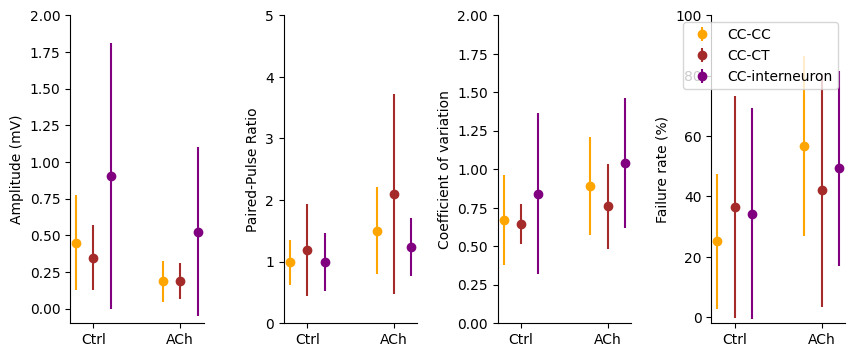

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 4))
plot_statistics(epsp_amplitude, ax1, 'Amplitude (mV)', ylim=(-0.1, 2))
plot_statistics(paired_pulse_ratio, ax2, 'Paired-Pulse Ratio', ylim=(0, 5))
plot_statistics(coefficient_of_variation, ax3, 'Coefficient of variation', ylim=(0, 2))
plot_statistics(failure_rate, ax4, 'Failure rate (%)', ylim=(-2, 100), show_legend=True)
plt.subplots_adjust(wspace=0.6)
plt.show()

## PXP files

In [13]:
from neo import get_io

In [16]:
data_dir = "downloads/hbp-d002323_NeuromodNeocortex-EPhys_pub/Acetylcholine modulation in S1 cortex layer 6/Dose response curve (MEC)/BC 25062019 B"

In [17]:
io = get_io(f"{data_dir}/BC 25062019 B 1µM.pxp")

In [18]:
data = io.read()

In [19]:
data

In [20]:
segment = data[0].segments[0]

In [21]:
segment

In [22]:
for sig in segment.analogsignals:
    print(f"{sig.name} {sig.shape} {sig.units} {sig.sampling_rate}")

In [24]:
Vmem_L = segment.filter(name="Vmem_L")[0]
plt.plot(Vmem_L.times, Vmem_L)

Vmem_R = segment.filter(name="Vmem_R")[0]
plt.plot(Vmem_R.times, Vmem_R)

ach1 = segment.filter(name="ach1")[0]
plt.plot(ach1.times, ach1)